In [30]:
#necessary libraries to import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline          #it tells the python env to draw the plots immediately after the current cell
import warnings
warnings.filterwarnings('ignore')

UsageError: unrecognized arguments: #it tells the python env to draw the plots immediately after the current cell


Now let's set the parameters that ctrl the general style of the plots. The style parameters ctrl properties like color of the background ..

In [31]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

#each time matplotlib loads ,it defines a runtime configuration containing the default styles for every plot element we create....
#FFE5B4---RGB color space(Hex peach)

Now we will load the dataset

In [32]:
data=pd.read_csv('C:\\Users\\phyed\\Desktop\\DATA SCIENCE-DATA TRAINED\\DATASETS\\archive\\world-happiness-report-2021.csv')

In [33]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Now we will take only relevent or interested columns which are necessary for analysis and rest will be dropped...

In [34]:
data_columns=['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

Now we will pass the new variables into old variable(data) and copy all the data of data_columns---

In [35]:
data=data[data_columns].copy()

Now we will rename our column names for convenience---

In [36]:
happy_df=data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'},axis=1)

In [37]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [38]:
# checking null values
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [39]:
happy_df.isnull().sum().sum()

0

COOL!!!!!!!No null values

Text(0, 0.5, 'GDP per capita')

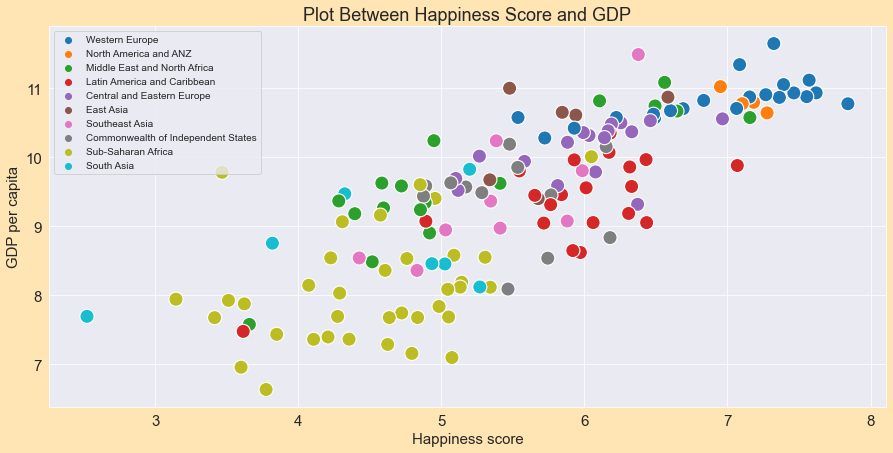

In [40]:
#plot b/w happiness and GDP
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot Between Happiness Score and GDP')
sns.scatterplot(x=happy_df.happiness_score,y=happy_df.logged_GDP_per_capita,hue=happy_df.regional_indicator,s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')

SOUTH ASIAN COUNTRY SHOWS LOWEST HAPPINESS SCORE

NOW WE WILL DO A PIE PLOT TO UNDERSTAND GDP BY REGION 

In [41]:
gdp_region=happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()

In [42]:
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

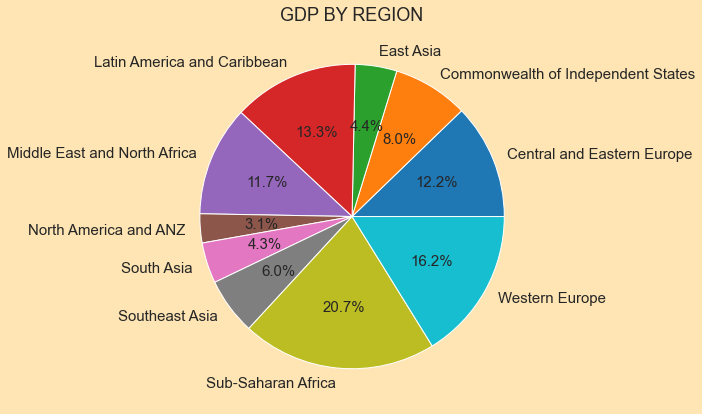

In [43]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP BY REGION')
plt.ylabel('')

back ground peach color is seen 

Let's find the total number of countries in each region 

In [44]:
total_country=happy_df.groupby('regional_indicator')['country_name'].count()

In [45]:
total_country

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

WE CAN SEE THAT SUB SAHARAN AFRICA HAS HIGHEST CONTRIBUTION TO WORLD'S GDP SINCE IT HAS HIGHEST NUMBER OF COUNTRIES...
WE CAN ALSO SEE THAT NORTH AMERICA AND ANZ HAS LEAST CONTRIBUTION TO WORLD'S GDP SINCE IT HAS LEAST NUMBER OF COUNTRIES....

C:\Users\phyed\AppData\Local\Temp\ipykernel_9336\749632156.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap='Blues',square=True,ax=ax)


<AxesSubplot:>

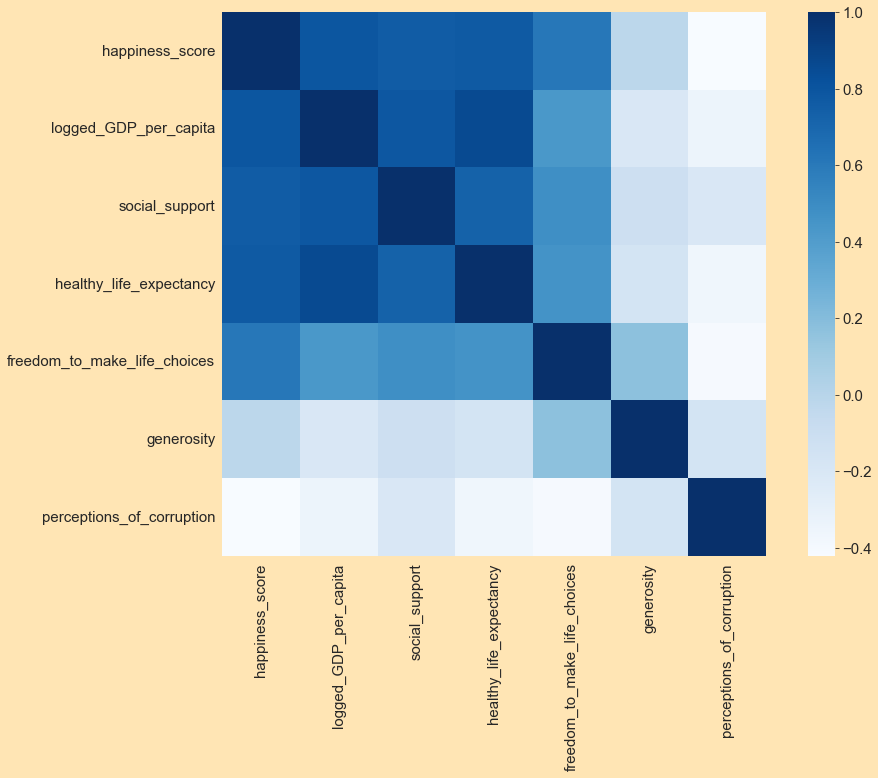

In [46]:
#NOW WE WILL CHECK CORRELATION OF EACH VARIABLES-----
#CORRELATION MAP
cor=happy_df.corr(method='pearson')
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap='Blues',square=True,ax=ax)

dark blue colors are showing high correlation
light blue /white colors are showing very low correlation 

In [47]:
# we will check region wise corruption 
# corruption in region ---

corruption=happy_df.groupby('regional_indicator')['perceptions_of_corruption'].mean()
print('-----------------------CORRUPTION IN REGION--------------------------------','\n',corruption)

-----------------------CORRUPTION IN REGION-------------------------------- 
 regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perceptions_of_corruption, dtype: float64


NORTH AMERICA AND ANZ HAS LEAST CORRUPTION PERCEPTION 

C:\Users\phyed\AppData\Local\Temp\ipykernel_9336\3188073014.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
C:\Users\phyed\AppData\Local\Temp\ipykernel_9336\3188073014.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45,ha='right')


Text(599.1068181818181, 0.5, 'Life Expectancy')

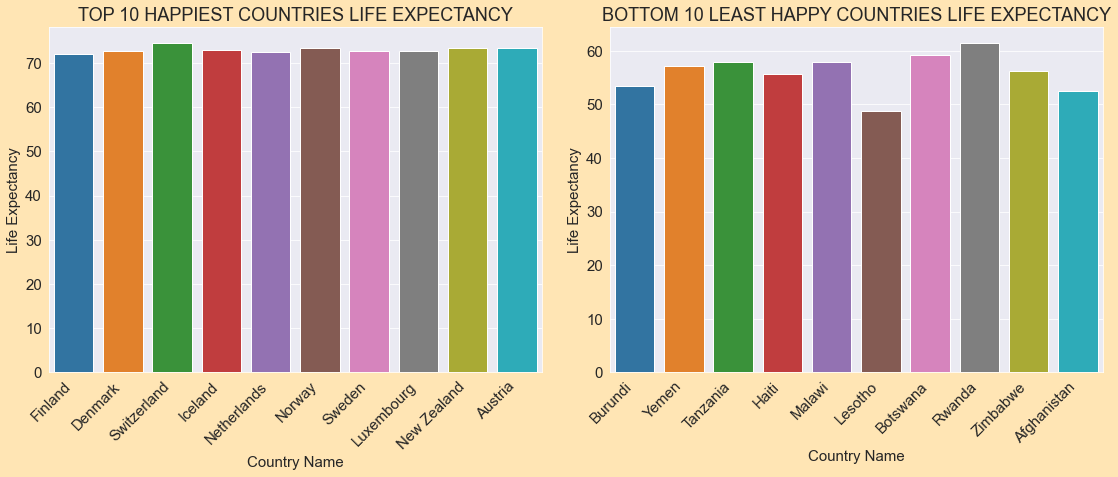

In [55]:
#Now we will plot top 10 & bottom 10 countries barplot----- 
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country_name
axes[0].set_title('TOP 10 HAPPIEST COUNTRIES LIFE EXPECTANCY')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country_name,y=top_10.healthy_life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels=bottom_10.country_name
axes[1].set_title('BOTTOM 10 LEAST HAPPY COUNTRIES LIFE EXPECTANCY')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')

sns.barplot(x=bottom_10.country_name,y=bottom_10.healthy_life_expectancy,ax=axes[1])

axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

Text(0, 0.5, 'Happiness score')

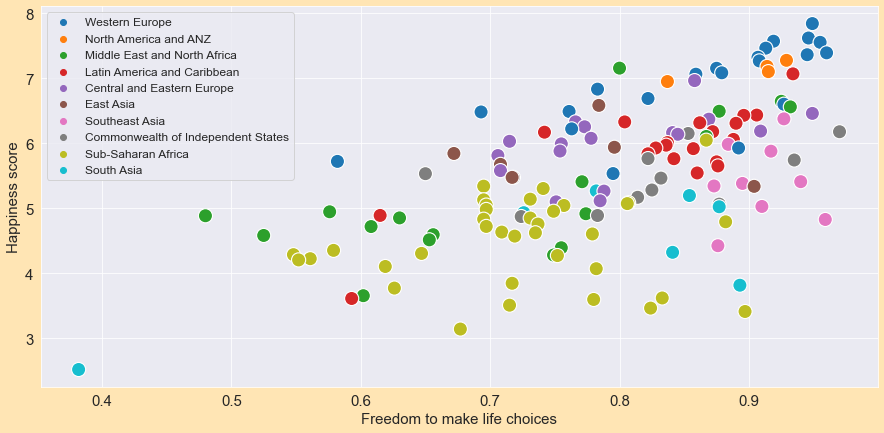

In [63]:
#Now we are going to see the plot between 'freedom_to_make_life_choices' & 'happiness_score'
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choices,y=happy_df.happiness_score,hue=happy_df.regional_indicator,s=200)
plt.legend(loc='upper left',fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')

Now we will see top 10 most corrupt countries

<BarContainer object of 10 artists>

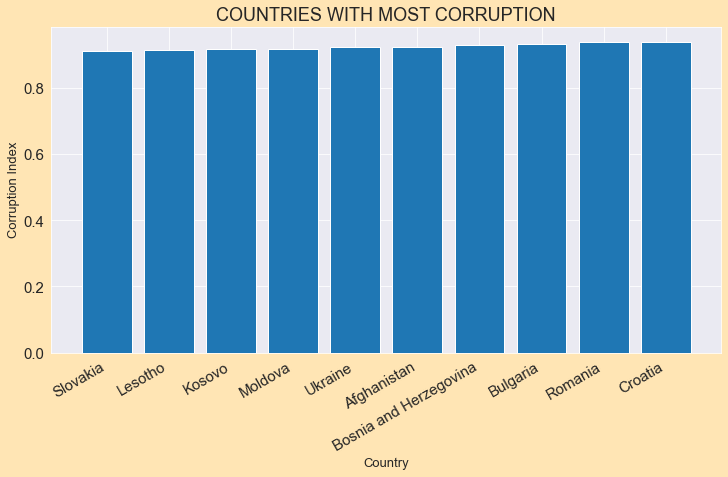

In [65]:
country=happy_df.sort_values(by='perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('COUNTRIES WITH MOST CORRUPTION')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.country_name,country.perceptions_of_corruption)

<BarContainer object of 10 artists>

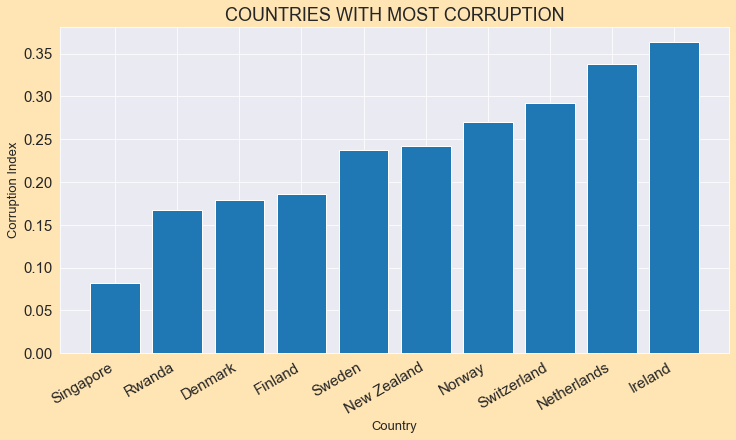

In [67]:
# least 10 corrupted countries
country=happy_df.sort_values(by='perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('COUNTRIES WITH MOST CORRUPTION')
plt.xlabel('Country',fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.country_name,country.perceptions_of_corruption)

Text(0, 0.5, 'Happiness Score')

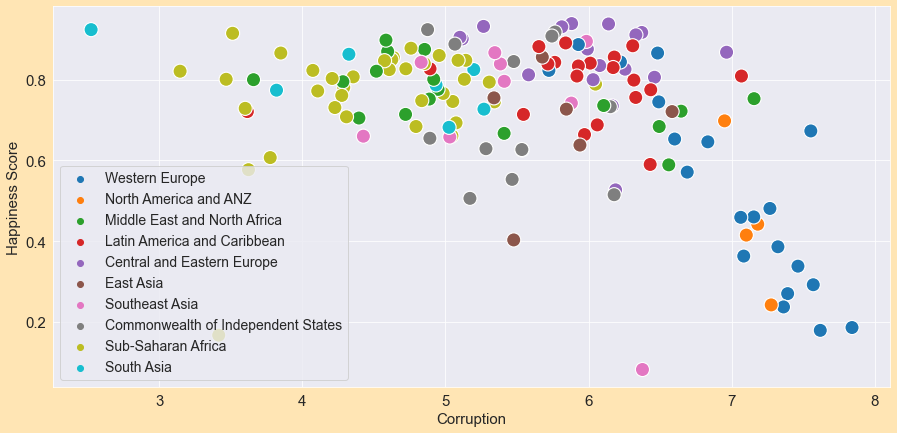

In [71]:
#CORRUPTION VS HAPPINESS FINAL CURVE----
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score,y=happy_df.perceptions_of_corruption,hue=happy_df.regional_indicator,s=200)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel('Corruption')
plt.ylabel('Happiness Score')

   Finally we can see that high happiness score shows least corruption ....